## Laptop Sales Prediction: Data Preparation

In [24]:
# Import libraries for data processing
import numpy as np 
import pandas as pd 

# Import libraries for data visualisation
import matplotlib.pyplot as plt

# Import libraries for system operations
import os 
from pathlib import Path

# Import dependencies to improve coding 
pd.options.mode.copy_on_write = True 

In [2]:
# Expand the pandas dataframe
pd.set_option("display.max_columns", 100)

Data Prepartion: Approach

+ Data Preprocessing
+ Data Transformation
+ Feature Engineering (p1)

In [3]:
# Load the dataset
ebay_laptop_file = "D:\\Projectwork Platform\MEP-Machine-Learning\Laptop_Price_Prediction\ebay_laptop_dataset.csv"
laptop_df = pd.read_csv(ebay_laptop_file)
laptop_df.head(3)

<>:2: SyntaxWarning: invalid escape sequence '\M'
<>:2: SyntaxWarning: invalid escape sequence '\M'
C:\Users\mian_\AppData\Local\Temp\ipykernel_22140\1759916389.py:2: SyntaxWarning: invalid escape sequence '\M'
  ebay_laptop_file = "D:\\Projectwork Platform\MEP-Machine-Learning\Laptop_Price_Prediction\ebay_laptop_dataset.csv"


,Brand,Price,Currency,Color,Features,Condition,Condition Description,Seller Note,GPU,Processor,Processor Speed,Processor Speed Unit,Type,Width of the Display,Height of the Display,OS,Storage Type,Hard Drive Capacity,Hard Drive Capacity Unit,SSD Capacity,SSD Capacity Unit,Screen Size (inch),Ram Size,Ram Size Unit
0,other,303.8,$,gray,"Backlit Keyboard, Built-in Microphone, Built...",New,"A brand-new, unused, unopened, undamaged item ...",undefined,intel,quad core,3.80,GHz,notebook/laptop,2160.0,1440.0,windows,ssd,512.0,gb,1.0,tb,14,8.0,gb
1,dell,400.0,$,black,"Backlit Keyboard, Bluetooth, Built-in Micropho...",Very Good - Refurbished,The item shows minimal wear and is backed by a...,aaa pcs is a microsoft authorized refurbisher ...,intel,intel core i7 8th generation,4.20,GHz,notebook/laptop,1920.0,1080.0,windows,ssd,2.0,tb,NaN,unknown,14,NaN,unknown
2,dell,175.0,$,black,"10/100 LAN Card, Backlit Keyboard, Bluetooth, ...",Used,An item that has been used previously. The ite...,"well kept, fully functional, includes battery,...",intel,intel core i5-6300u,2.40,GHz,notebook/laptop,1920.0,1080.0,windows,ssd,500.0,gb,500.0,gb,14,16.0,gb


## Data Preprocessing

+ Removing null values missing values
+ Detecting and Removing inconsistencies
+ Removing irrelevant data

In [4]:
# Show the number of features within the dataset
num_features = laptop_df.shape[1]
print(f"Features: {laptop_df.columns}")
print(f"Number of features: {num_features}")

Features: Index(['Brand', 'Price', 'Currency', 'Color', 'Features', 'Condition',
       'Condition Description', 'Seller Note', 'GPU', 'Processor',
       'Processor Speed', 'Processor Speed Unit', 'Type',
       'Width of the Display', 'Height of the Display', 'OS', 'Storage Type',
       'Hard Drive Capacity', 'Hard Drive Capacity Unit', 'SSD Capacity',
       'SSD Capacity Unit', 'Screen Size (inch)', 'Ram Size', 'Ram Size Unit'],
      dtype='object')
Number of features: 24


In [5]:
# Identify the datatypes of the features
feature_datatypes = laptop_df.dtypes.to_frame("DataTypes")
missing_values = laptop_df.isnull().sum().to_frame("MissingValues")

# Combine the frames --> feature dataframe
feature_df = pd.concat([feature_datatypes, missing_values], axis=1).reset_index()
feature_df = feature_df.rename(columns={"index": "Features"})
feature_df

# Filter the features with missing values
feature_miss = feature_df[feature_df["MissingValues"] > 0]
feature_miss_df = laptop_df[feature_miss["Features"].values]
feature_miss_df
# print(f"Features with missing values: {feature_miss.shape[0]}")

,Features,Processor Speed,Width of the Display,Height of the Display,Hard Drive Capacity,SSD Capacity,Screen Size (inch),Ram Size
0,"Backlit Keyboard, Built-in Microphone, Built...",3.80,2160.0,1440.0,512.0,1.0,14,8.0
1,"Backlit Keyboard, Bluetooth, Built-in Micropho...",4.20,1920.0,1080.0,2.0,NaN,14,NaN
2,"10/100 LAN Card, Backlit Keyboard, Bluetooth, ...",2.40,1920.0,1080.0,500.0,500.0,14,16.0
3,"Bluetooth, Built-in Microphone, Built-in Webca...",2.40,1366.0,768.0,16.0,NaN,11.6,4.0
4,"10/100 LAN Card, Built-in Microphone, Built-in...",1.40,1366.0,768.0,NaN,256.0,12.5,8.0
...,...,...,...,...,...,...,...,...
4178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4180,"Touchscreen, 10/100 LAN Card, Bluetooth, Ba...",2.80,1920.0,1080.0,NaN,120.0,12.5,NaN
4181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**1. Inconsistent Values**

In [6]:
# Detect inconsistencies
for feature in laptop_df.columns[:3]:
    # Check if all values are convertible to numeric values
    is_convertible = "Convertible" if pd.api.types.is_numeric_dtype(laptop_df[feature]) else "Not Convertible"
    print(f"{feature}: {is_convertible}")

# Form a dataframe where features are convertible to numeric data
def is_convertible(feature ):
    return "YES" if pd.api.types.is_numeric_dtype(laptop_df[feature]) else "NO"

feature_df["Convertible"] = feature_df["Features"].transform(is_convertible)

# Filter features that are convertible and non textual
features_nonconv = feature_df[(feature_df["Convertible"] == "NO" )]["Features"].values
inconsistent_features = laptop_df[features_nonconv][["Processor Speed", "Screen Size (inch)"]]
inconsistent_features.head()

Brand: Not Convertible
Price: Convertible
Currency: Not Convertible


,Processor Speed,Screen Size (inch)
0,3.80,14
1,4.20,14
2,2.40,14
3,2.40,11.6
4,1.40,12.5


In [7]:
# Create sequences from Processor Speed and Screen Size (inch)
processor_speed = laptop_df["Processor Speed"].values
screen_size = laptop_df["Screen Size (inch)"].values 

# Detect inconsistent data in the deataset
def detect_inconsistencies(sequences: list[str]) -> list:
    # Define lists to store real and inconsistent values 
    incon_list = []
    real_list = []
    
    for value in sequences: 
        try:
            # check with special values or characters are inside 
            real_value = float(value)
            real_list.append(real_value)
        except ValueError:
            incon_list.append(value)

    # Return inconsistent list
    return incon_list

incon_lst1 = detect_inconsistencies(processor_speed)
incon_lst2 = detect_inconsistencies(screen_size)

print(f"Processor speed: {incon_lst1}")
print(f"Screen Size: {incon_lst2}")

Processor speed: ['o4.2', 'o3.4', 'o2.8', 'o3.9', 'o4.5', 'o3.3', 'o3.6', 'o3.4', 'o2.6', 'o3.4', '@1.7', 'o4.3', 'o3.4', 'o4.4']
Screen Size: ['14.1.', '12.3.', '14.1.', '12()', "1314'", '12.5(', '11.6.', '15.6.', '12.5/', '15.4.', '15.6.', '11.6.', '14.1.', '13.3.', '14.1.', '14.1.', '15.6.', '14.1.', '.', '10.1(', '11.6.', '12.5.', '13.3+', '14-15']


In [8]:
# Remove inconsistent data based on give info
laptop_df["Processor Speed"] = laptop_df["Processor Speed"].str.extract(r"(\d+\.\d+)")
laptop_df["Screen Size (inch)"] = laptop_df["Screen Size (inch)"].str.extract(r"(\d.+\.\d+|\d+)")

# Convert the feature to float
laptop_df["Processor Speed"] = laptop_df["Processor Speed"].astype(float)
laptop_df["Screen Size (inch)"] = laptop_df["Screen Size (inch)"].astype(float)

**2. Missing Values**

Approach for elimenating missing values:
+ for numerical values: fill all with zeros
+ convert values from selected features into standard units
+ compute the mean value and replace zeros by it

In [9]:
# Remove the nullvalues from numerical features
laptop_df["Processor Speed"] = laptop_df["Processor Speed"].fillna(0)
laptop_df["Width of the Display"] = laptop_df["Width of the Display"].fillna(0)
laptop_df["Height of the Display"] = laptop_df["Height of the Display"].fillna(0)
laptop_df["Hard Drive Capacity"] = laptop_df["Hard Drive Capacity"].fillna(0)
laptop_df["SSD Capacity"] = laptop_df["SSD Capacity"].fillna(0)
laptop_df["Screen Size (inch)"] = laptop_df["Screen Size (inch)"].fillna(0)
laptop_df["Ram Size"] = laptop_df["Ram Size"].fillna(0)

# Remove the nullvalues of categorical features 
laptop_df["Features"] = laptop_df["Features"].fillna("No specifications")

In [10]:
count_p_unit = laptop_df["SSD Capacity Unit"].value_counts()
print(count_p_unit)

SSD Capacity Unit
unknown    2054
gb         1930
tb          199
Name: count, dtype: int64


In [11]:
# Convert some of the feature to its standardised unit
# Identify unique values for these irrelevan features 
irrel_features = ['Currency','Processor Speed Unit','Storage Type', 'Hard Drive Capacity Unit','SSD Capacity Unit', 'Ram Size Unit']
irrel_features.remove("Storage Type")
for irr_feature in irrel_features:
    # Retrieve unique values
    unique_vals = laptop_df[irr_feature].unique()
    num_uniques = len(unique_vals)
    print(f"{irr_feature}: {unique_vals}")

    # Identify the number of samples per unit 
    count_p_unit = laptop_df[irr_feature].value_counts()
    print(count_p_unit, "\n", "--"*100)
# laptop_df["SSD Capacity Unit"].value_counts() # gb, tb, unknown
# laptop_df["Hard Drive Capacity Unit"].value_counts() # gb, tb, unknown
# laptop_df["Ram Size Unit"].value_counts() # unknown, gb, mb
# laptop_df["Processor Speed Unit"].value_counts() # unknown, GHz, MHz
# laptop_df


Currency: ['$']
Currency
$    4183
Name: count, dtype: int64 
 --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Processor Speed Unit: ['GHz' 'unknown' 'MHz']
Processor Speed Unit
unknown    2093
GHz        2086
MHz           4
Name: count, dtype: int64 
 --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Hard Drive Capacity Unit: ['gb' 'tb' 'unknown']
Hard Drive Capacity Unit
unknown    3078
gb          980
tb          125
Name: count, dtype: int64 
 --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
SSD Capacity Unit: ['tb' 'unknown' 'gb']
S

Suggestion for converting units to standard units:
+ Ram Size: convert all into gigabytes(mb)  (su = gb)
+ SSD Capacity: convert all from tb to gb (su = gb)
+ Hard Drive Capacity: convert all from tb to gb (su = gb)
+ Processor Speed Unit: convert all from mb to gb (su = gb) remark: values with mb suffix lays between 0 and 1, so it has no effect on model training

Unknown units will be determined on the highest amount of units distributed within the feature. 

Investigate the values per feature with its units

In [12]:
# laptop_df[ laptop_df["Ram Size Unit"] == "mb"]
def discover_unit_distr(feature, unit_feature, sel_unit):
    discover_features = laptop_df[[feature, unit_feature]]

    if type(sel_unit) == list:
        cond1 = discover_features[unit_feature] == sel_unit[0]
        cond2 = discover_features[unit_feature] == sel_unit[1]
        unit_df = discover_features[cond1 | cond2]
    elif type(sel_unit) == str:
        cond_str = discover_features[unit_feature] == sel_unit
        unit_df = discover_features[cond_str]
    return unit_df

# discover_unit_distr("Processor Speed", "Processor Speed Unit", ["MHz", ""])
# discover_unit_distr("Hard Drive Capacity", "Hard Drive Capacity Unit", "tb")
# discover_unit_distr("Ram Size", "Ram Size Unit", "mb")
discover_unit_distr("SSD Capacity", "SSD Capacity Unit", "tb")

,SSD Capacity,SSD Capacity Unit
0,1.0,tb
20,1.0,tb
27,2.0,tb
60,1.0,tb
229,2.0,tb
...,...,...
4007,1.0,tb
4028,2.0,tb
4097,1.0,tb
4111,2.0,tb


In [13]:
# Create function: to convert values based on standard unit
def standardize_unit_vals(feature: str, unit_feature:str, unit:str, std_unit:str) -> pd.Series:
    if (unit == "mb" or unit == "MHz") and (std_unit == "gb" or std_unit == "GHz"):
        # Create a unit converter 
        unit_converter = lambda r: r[feature] /1000 if r[unit_feature] == unit else r[feature]
        
        # Apply unit converter for each dataframe
        df = laptop_df[[feature, unit_feature]]
        df[feature] = df[[feature, unit_feature]].apply(unit_converter, axis=1)

    elif std_unit == "gb" and unit == "tb": 
        # Create a unit converter 
        unit_converter = lambda r: r[feature]*1000 if r[unit_feature] == unit else r[feature]
        
        # Apply unit converter for each dataframe
        df = laptop_df[[feature, unit_feature]]
        df[feature] = df[[feature, unit_feature]].apply(unit_converter, axis=1)
    else:
        return f"unknown unit {unit, std_unit} --> No clear conversion"

    return df[feature]

# Standardize values through unit conversion
laptop_df["Processor Speed"] = standardize_unit_vals("Processor Speed", "Processor Speed Unit", "MHz", "GHz")
laptop_df["SSD Capacity"] = standardize_unit_vals("SSD Capacity", "SSD Capacity Unit", "tb", "gb")
laptop_df["Ram Size"] = standardize_unit_vals("Ram Size", "Ram Size Unit", "mb", "gb")
laptop_df["Hard Drive Capacity"] = standardize_unit_vals("Hard Drive Capacity", "Hard Drive Capacity Unit", "tb", "gb")

In [14]:
# Compute the mean value to replace all zero values
compute_mean = lambda feature: np.mean(laptop_df[feature].values)

# Replace all nullvalues by its mean values
laptop_df["Processor Speed"] = laptop_df["Processor Speed"].replace(0.0, compute_mean("Processor Speed"))
laptop_df["Width of the Display"] = laptop_df["Width of the Display"].replace(0, compute_mean("Width of the Display"))
laptop_df["Height of the Display"] = laptop_df["Height of the Display"].replace(0, compute_mean("Height of the Display"))
laptop_df["Hard Drive Capacity"] = laptop_df["Hard Drive Capacity"].replace(0, compute_mean("Hard Drive Capacity"))
laptop_df["SSD Capacity"] = laptop_df["SSD Capacity"].replace(0, compute_mean("SSD Capacity"))
laptop_df["Screen Size (inch)"] = laptop_df["Screen Size (inch)"].replace(0, compute_mean("Screen Size (inch)"))
laptop_df["Ram Size"] = laptop_df["Ram Size"].replace(0, compute_mean("Ram Size"))

# Modify the format
laptop_df["SSD Capacity"] = laptop_df["SSD Capacity"].apply(lambda x: round(x, 2))
laptop_df["Hard Drive Capacity"] = laptop_df["Hard Drive Capacity"].apply(lambda x: round(x, 2))
laptop_df["Ram Size"] = laptop_df["Ram Size"].apply(lambda x: round(x, 2))

**3. Irrelevant Data**

Features that contain irrelevant data:
+ Storage Type
+ Hard Drive Capacity Unit
+ Processor Speed Unit
+ SSD Capacity Unit
+ Ram Size Unit

In [15]:
laptop_df.head()[irrel_features]

,Currency,Processor Speed Unit,Hard Drive Capacity Unit,SSD Capacity Unit,Ram Size Unit
0,$,GHz,gb,tb,gb
1,$,GHz,tb,unknown,unknown
2,$,GHz,gb,gb,gb
3,$,GHz,gb,unknown,gb
4,$,GHz,unknown,gb,gb


In [16]:
# Remove irrelevant data
laptop_df = laptop_df.drop(columns=irrel_features, axis=1)
laptop_df.head()

,Brand,Price,Color,Features,Condition,Condition Description,Seller Note,GPU,Processor,Processor Speed,Type,Width of the Display,Height of the Display,OS,Storage Type,Hard Drive Capacity,SSD Capacity,Screen Size (inch),Ram Size
0,other,303.80,gray,"Backlit Keyboard, Built-in Microphone, Built...",New,"A brand-new, unused, unopened, undamaged item ...",undefined,intel,quad core,3.8,notebook/laptop,2160.0,1440.0,windows,ssd,512.00,1000.00,14.0,8.00
1,dell,400.00,black,"Backlit Keyboard, Bluetooth, Built-in Micropho...",Very Good - Refurbished,The item shows minimal wear and is backed by a...,aaa pcs is a microsoft authorized refurbisher ...,intel,intel core i7 8th generation,4.2,notebook/laptop,1920.0,1080.0,windows,ssd,2000.00,205.95,14.0,5.98
2,dell,175.00,black,"10/100 LAN Card, Backlit Keyboard, Bluetooth, ...",Used,An item that has been used previously. The ite...,"well kept, fully functional, includes battery,...",intel,intel core i5-6300u,2.4,notebook/laptop,1920.0,1080.0,windows,ssd,500.00,500.00,14.0,16.00
3,hp,85.00,black,"Bluetooth, Built-in Microphone, Built-in Webca...",Good - Refurbished,The item shows moderate wear and is backed by ...,1-year allstate warranty. the original hp char...,intel,intel celeron n,2.4,notebook/laptop,1366.0,768.0,chrome,emmc,16.00,205.95,11.6,4.00
4,dell,101.25,other,"10/100 LAN Card, Built-in Microphone, Built-in...",Good - Refurbished,The item shows moderate wear and is backed by ...,laptops is tested & fully working with some si...,other,intel core i5 6th generation,1.4,notebook/laptop,1366.0,768.0,windows,ssd,98.89,256.00,12.5,8.00


Refining dataset: 

+ Change the column names
+ Remove laptop records which have no meaning (unknown specification, unknown OS, unknow color, etc. )

In [17]:
# Change the name of dataset
laptop_df = laptop_df.rename(columns={
    'Height of the Display': "Display Height",
    "Width of the Display": "Display Width",
})

laptop_df.columns

Index(['Brand', 'Price', 'Color', 'Features', 'Condition',
       'Condition Description', 'Seller Note', 'GPU', 'Processor',
       'Processor Speed', 'Type', 'Display Width', 'Display Height', 'OS',
       'Storage Type', 'Hard Drive Capacity', 'SSD Capacity',
       'Screen Size (inch)', 'Ram Size'],
      dtype='object')

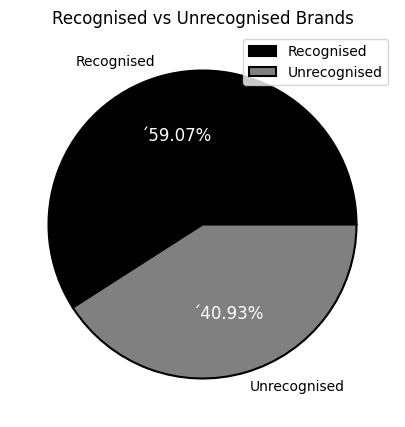

Recognised laptops: 2471
Unrecognised laptops: 1712
Ratio: 0.69


In [18]:
# Identify records which have no meaningful data 
other_laptops = laptop_df[laptop_df["Brand"] == "other"]
other_laptops.head()

# Understand the distribution of features from unknown laptops --> choose a self defined brand name
for i, feature in enumerate(other_laptops):
    # Skip features that are not relevant for analysis
    if feature in ["Features", "Condition", "Condition Description", "Seller Note"]:
        continue
    # Extract unique values 
    unique_vals = other_laptops[feature].unique()
    num_uniques = other_laptops[feature].nunique()

    # print(f"Feature {i} = {feature}: {unique_vals} (size = {num_uniques})", "\n", "--"*100)

# Visuelise difference between recognised and unrecognised brands 
recognised_laptops = laptop_df[laptop_df["Brand"] != "other"].shape[0]
unrecognised_laptop = laptop_df[laptop_df["Brand"] == "other"].shape[0]

laptops = ["Recognised", "Unrecognised"]
plt.figure(figsize=(15, 5))
pies, texts, autotexts = plt.pie([recognised_laptops, unrecognised_laptop], labels=laptops, autopct='´%1.2f%%')

for pie in pies:
    pie.set_edgecolor("black")
    pie.set_linewidth(1.5)

pies[0].set_facecolor("black")
pies[1].set_facecolor("gray")

for autotext in autotexts:
    autotext.set_color("white")
    autotext.set_fontsize(12)

# add description to pie chart
plt.title("Recognised vs Unrecognised Brands", fontsize=12)
plt.legend()
plt.show()

print(f"Recognised laptops: {recognised_laptops}")
print(f"Unrecognised laptops: {unrecognised_laptop}")
print(f"Ratio: {unrecognised_laptop/recognised_laptops:.2f}")

Unknown laptop brands will not be considered due to high requirement on workload. To make the workflow more smoothly for this place, we consider to filter out the unrecognised laptops and use the recognised laptop brand for model training. Statistics shows that 60 procent of the laptops recorded are recognised. Therefore, this will be considered for further process.

In [25]:
# Function to choose the type of laptops: Recognised or Unrecognised
def choose_type_laptops(chosen_type: str, laptop_df: pd.DataFrame = laptop_df):
    # Initilaise the path 
    path = Path("D:\Projectwork Platform\MEP-Machine-Learning\Laptop_Price_Prediction\data_preparation")
    
    # Filter the dataset based on the chosen type + Store the dataset
    if chosen_type == "recognised":    
        # filter out the unknown laptop 
        sel_laptops = laptop_df[laptop_df["Brand"] != "other"]
        filename = os.path.join(path, f"ebay_laptop_data_{chosen_type}.csv")
        print(f"Unrecognised laptop are filtered")
        print(f"Remanining laptops: {sel_laptops.shape[0]}")
        
        # Save the dataset
        # sel_laptops.to_csv(f"ebay_laptop_data_{chosen_type}.csv")
        sel_laptops.to_csv(filename, index=False)
        print(f"File saved as: {filename}")

    else:
        # filter out the recognised laptops 
        sel_laptops = laptop_df[laptop_df["Brand"] == "other"]
        filename = os.path.join(path, f"ebay_laptop_data_{chosen_type}.csv")
        print(f"Recognised laptop are filtered")
        print(f"Remaining laptops: {sel_laptops.shape[0]}")

        # Save the dataset
        # sel_laptops.to_csv(f"ebay_laptop_data_{chosen_type}.csv")
        sel_laptops.to_csv(filename, index=False)
        print(f"File saved as: {filename}")

# Choose the type of laptops
# choose_type_laptops("recognised")
choose_type_laptops("unrecognised")

Recognised laptop are filtered
Remaining laptops: 1712
File saved as: D:\Projectwork Platform\MEP-Machine-Learning\Laptop_Price_Prediction\data_preparation\ebay_laptop_data_unrecognised.csv


<>:4: SyntaxWarning: invalid escape sequence '\P'
<>:4: SyntaxWarning: invalid escape sequence '\P'
C:\Users\mian_\AppData\Local\Temp\ipykernel_22140\1252393780.py:4: SyntaxWarning: invalid escape sequence '\P'
  path = Path("D:\Projectwork Platform\MEP-Machine-Learning\Laptop_Price_Prediction\data_preparation")
